## Cálculo de longitudes y frecuencias de las líneas de tren

Esta librería determina la longitud y frecuencias diarias de todas las líneas de Renfe (AVE-Larga distancia, Media Distancia-Regional Cercanías, FGC y Euskotren-Trena) para todo el territorio español

In [7]:
# importar librerías
import pandas as pd
import geopandas as gpd
import urbanaccess as ua
import pandana as pdna
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
gpd.options.use_pygeos = True
from urbanaccess.config import settings
from urbanaccess.gtfsfeeds import feeds
from urbanaccess import gtfsfeeds
from urbanaccess.gtfs.gtfsfeeds_dataframe import gtfsfeeds_dfs
from urbanaccess.network import ua_network, load_network
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
settings.to_dict()

{'data_folder': 'data',
 'logs_folder': 'logs',
 'log_file': True,
 'log_console': False,
 'log_name': 'urbanaccess',
 'log_filename': 'urbanaccess',
 'txt_encoding': 'utf-8',
 'gtfs_api': {'gtfsdataexch': 'http://www.gtfs-data-exchange.com/api/agencies?format=csv'}}

In [3]:
feeds.to_dict()

{'gtfs_feeds': {}}

In [4]:
feeds.add_feed(add_dict={'av, ld, md': 'https://ssl.renfe.com/gtransit/Fichero_AV_LD/google_transit.zip'})
feeds.add_feed(add_dict={'cercanias': 'https://ssl.renfe.com/ftransit/Fichero_CER_FOMENTO/fomento_transit.zip'})
feeds.add_feed(add_dict={'feve': 'https://data.renfe.com/dataset/5f80afa2-798c-46a4-8f96-bca0835b3cf0/resource/e593b825-78c2-45e1-a8ca-9fbea2f3faff/download/horarios-feve.zip'})
feeds.add_feed(add_dict={'fgc': 'https://www.fgc.cat/google/google_transit.zip'})
feeds.add_feed(add_dict={'euskotren': 'https://gtfs.euskotren.eus/Euskotren_gtfs.zip'})

Added 1 feeds to gtfs_feeds: {'av, ld, md': 'https://ssl.renfe.com/gtransit/Fichero_AV_LD/google_transit.zip'}
Added 1 feeds to gtfs_feeds: {'cercanias': 'https://ssl.renfe.com/ftransit/Fichero_CER_FOMENTO/fomento_transit.zip'}
Added 1 feeds to gtfs_feeds: {'feve': 'https://data.renfe.com/dataset/5f80afa2-798c-46a4-8f96-bca0835b3cf0/resource/e593b825-78c2-45e1-a8ca-9fbea2f3faff/download/horarios-feve.zip'}
Added 1 feeds to gtfs_feeds: {'fgc': 'https://www.fgc.cat/google/google_transit.zip'}
Added 1 feeds to gtfs_feeds: {'euskotren': 'https://gtfs.euskotren.eus/Euskotren_gtfs.zip'}


In [5]:
feeds.to_dict()

{'gtfs_feeds': {'av, ld, md': 'https://ssl.renfe.com/gtransit/Fichero_AV_LD/google_transit.zip',
  'cercanias': 'https://ssl.renfe.com/ftransit/Fichero_CER_FOMENTO/fomento_transit.zip',
  'feve': 'https://data.renfe.com/dataset/5f80afa2-798c-46a4-8f96-bca0835b3cf0/resource/e593b825-78c2-45e1-a8ca-9fbea2f3faff/download/horarios-feve.zip',
  'fgc': 'https://www.fgc.cat/google/google_transit.zip',
  'euskotren': 'https://gtfs.euskotren.eus/Euskotren_gtfs.zip'}}

In [8]:
gtfsfeeds.download()

5 GTFS feed(s) will be downloaded here: data\gtfsfeed_zips
av, ld, md GTFS feed downloaded successfully. Took 0.68 seconds for 800,162.0KB
cercanias GTFS feed downloaded successfully. Took 5.48 seconds for 9,666,295.0KB
feve GTFS feed downloaded successfully. Took 0.83 seconds for 237,025.0KB
fgc GTFS feed downloaded successfully. Took 1.27 seconds for 2,263,741.0KB
euskotren GTFS feed downloaded successfully. Took 1.18 seconds for 1,777,418.0KB
GTFS feed download completed. Took 9.44 seconds
av, ld, md.zip successfully extracted to: data\gtfsfeed_text\av, ld, md
cercanias.zip successfully extracted to: data\gtfsfeed_text\cercanias
euskotren.zip successfully extracted to: data\gtfsfeed_text\euskotren
feve.zip successfully extracted to: data\gtfsfeed_text\feve
fgc.zip successfully extracted to: data\gtfsfeed_text\fgc
GTFS feed zipfile extraction completed. Took 0.51 seconds for 5 files


In [9]:
#crear xarxa
validation = True
verbose = True
bbox = (-9.83,35.98,4.89,44.04)
remove_stops_outsidebbox = True
append_definitions = True

loaded_feeds = ua.gtfs.load.gtfsfeed_to_df(gtfsfeed_path=None,
                                           validation=validation,
                                           verbose=verbose,
                                           bbox=bbox,
                                           remove_stops_outsidebbox=remove_stops_outsidebbox,
                                           append_definitions=append_definitions)

Checking GTFS text file header whitespace... Reading files using encoding: utf-8 set in configuration.
Removing whitespace from header(s) in: data\gtfsfeed_text\av, ld, md\agency.txt...
Removing whitespace from header(s) in: data\gtfsfeed_text\av, ld, md\calendar.txt...
Removing whitespace from header(s) in: data\gtfsfeed_text\av, ld, md\calendar_dates.txt...
Removing whitespace from header(s) in: data\gtfsfeed_text\av, ld, md\routes.txt...
Removing whitespace from header(s) in: data\gtfsfeed_text\av, ld, md\stops.txt...
Removing whitespace from header(s) in: data\gtfsfeed_text\av, ld, md\stop_times.txt...
Removing whitespace from header(s) in: data\gtfsfeed_text\av, ld, md\trips.txt...
GTFS text file header whitespace check completed. Took 0.54 seconds
--------------------------------
Processing GTFS feed: av, ld, md
The unique agency id: renfe_operadora was generated using the name of the agency in the agency.txt file.
Unique agency id operation complete. Took 0.01 seconds
Unique GTF

<AxesSubplot:xlabel='stop_lon', ylabel='stop_lat'>

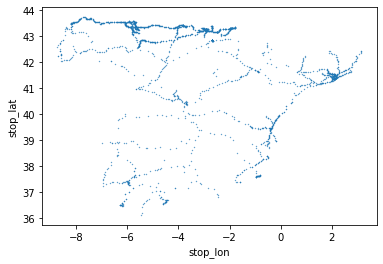

In [10]:
loaded_feeds.stops.plot(kind='scatter', x='stop_lon', y='stop_lat', s=0.1)

In [14]:
ua.gtfs.network.create_transit_net(gtfsfeeds_dfs=loaded_feeds,
                                   day='tuesday',
                                   timerange=['00:00:00', '23:59:59'],
                                   calendar_dates_lookup=None)

Using calendar to extract service_ids to select trips.
11,962 service_ids were extracted from calendar
30,527 trip(s) 19.30 percent of 158,178 total trip records were found in calendar for GTFS feed(s): ['av, ld, md', 'cercanias', 'euskotren', 'feve']
0 trip(s) 0 percent of 158,178 total trip records were found in calendar for GTFS feed: fgc
NOTE: If you expected more trips to have been extracted and your GTFS feed(s) have a calendar_dates file, consider utilizing the calendar_dates_lookup parameter in order to add additional trips based on information inside of calendar_dates. This should only be done if you know the corresponding GTFS feed is using calendar_dates instead of calendar to specify service_ids. When in doubt do not use the calendar_dates_lookup parameter.
30,527 of 158,178 total trips were extracted representing calendar day: tuesday. Took 0.18 seconds
There are no departure time records missing from trips following the specified schedule. There are no records to interpol

In [15]:
urbanaccess_net = ua.network.ua_network

<AxesSubplot:xlabel='x', ylabel='y'>

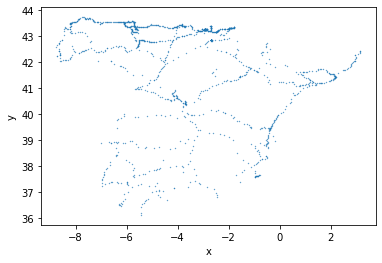

In [16]:
urbanaccess_net.transit_nodes.plot(kind='scatter', x='x', y='y', s=0.1)

In [17]:
urbanaccess_net.transit_nodes.head()

,x,y,unique_agency_id,route_type,stop_id,stop_name,parent_station,stop_code,wheelchair_boarding,zone_id,location_type,net_type
node_id,,,,,,,,,,,,
71801_renfe_operadora,2.140624,41.379220,renfe_operadora,2.0,71801,Barcelona-Sants,NaN,NaN,NaN,NaN,NaN,transit
61307_renfe_operadora,-0.975122,37.604967,renfe_operadora,2.0,61307,Cartagena,NaN,NaN,NaN,NaN,NaN,transit
61304_renfe_operadora,-0.967078,37.746905,renfe_operadora,2.0,61304,Torre-Pacheco,NaN,NaN,NaN,NaN,NaN,transit
61303_renfe_operadora,-0.950891,37.818840,renfe_operadora,2.0,61303,Balsicas-Mar Menor,NaN,NaN,NaN,NaN,NaN,transit
61200_renfe_operadora,-1.129955,37.974650,renfe_operadora,2.0,61200,Murcia,NaN,NaN,NaN,NaN,NaN,transit


In [18]:
loaded_feeds.stops.head()

,stop_id,stop_code,stop_name,stop_desc,stop_lat,stop_lon,zone_id,stop_url,location_type,parent_station,stop_timezone,unique_agency_id,unique_feed_id,route_type,wheelchair_boarding,location_type_desc,wheelchair_boarding_desc,unique_stop_id
0,71801,NaN,Barcelona-Sants,NaN,41.379220,2.140624,NaN,NaN,NaN,NaN,Europe/Madrid ...,renfe_operadora,"av,_ld,_md_1",2.0,NaN,None,None,71801_renfe_operadora
1,61307,NaN,Cartagena,NaN,37.604967,-0.975122,NaN,NaN,NaN,NaN,Europe/Madrid ...,renfe_operadora,"av,_ld,_md_1",2.0,NaN,None,None,61307_renfe_operadora
2,61304,NaN,Torre-Pacheco,NaN,37.746905,-0.967078,NaN,NaN,NaN,NaN,Europe/Madrid ...,renfe_operadora,"av,_ld,_md_1",2.0,NaN,None,None,61304_renfe_operadora
3,61303,NaN,Balsicas-Mar Menor,NaN,37.818840,-0.950891,NaN,NaN,NaN,NaN,Europe/Madrid ...,renfe_operadora,"av,_ld,_md_1",2.0,NaN,None,None,61303_renfe_operadora
4,61200,NaN,Murcia,NaN,37.974650,-1.129955,NaN,NaN,NaN,NaN,Europe/Madrid ...,renfe_operadora,"av,_ld,_md_1",2.0,NaN,None,None,61200_renfe_operadora


In [20]:
loaded_feeds.stops.info()
urbanaccess_net.transit_nodes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2422 entries, 0 to 2421
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   stop_id                   2421 non-null   object 
 1   stop_code                 0 non-null      float64
 2   stop_name                 2422 non-null   object 
 3   stop_desc                 0 non-null      float64
 4   stop_lat                  2422 non-null   float64
 5   stop_lon                  2422 non-null   float64
 6   zone_id                   0 non-null      float64
 7   stop_url                  0 non-null      float64
 8   location_type             1121 non-null   float64
 9   parent_station            621 non-null    object 
 10  stop_timezone             761 non-null    object 
 11  unique_agency_id          2422 non-null   object 
 12  unique_feed_id            2422 non-null   object 
 13  route_type                1481 non-null   float64
 14  wheelcha

In [ ]:
boolean = not loaded_feeds.stops[col].is_unique      # True (credit to @Carsten)
boolean = df[col].duplicated().any() # True

In [22]:
for col in loaded_feeds.stops.columns:
    boolean = not loaded_feeds.stops[col].is_unique
    boolean = loaded_feeds.stops[col].duplicated().any()
    print(col)
    print(boolean)

stop_id
True
stop_code
True
stop_name
True
stop_desc
True
stop_lat
True
stop_lon
True
zone_id
True
stop_url
True
location_type
True
parent_station
True
stop_timezone
True
unique_agency_id
True
unique_feed_id
True
route_type
True
wheelchair_boarding
True
location_type_desc
True
wheelchair_boarding_desc
True
unique_stop_id
False


<AxesSubplot:xlabel='stop_lon', ylabel='stop_lat'>

<AxesSubplot:xlabel='x', ylabel='y'>

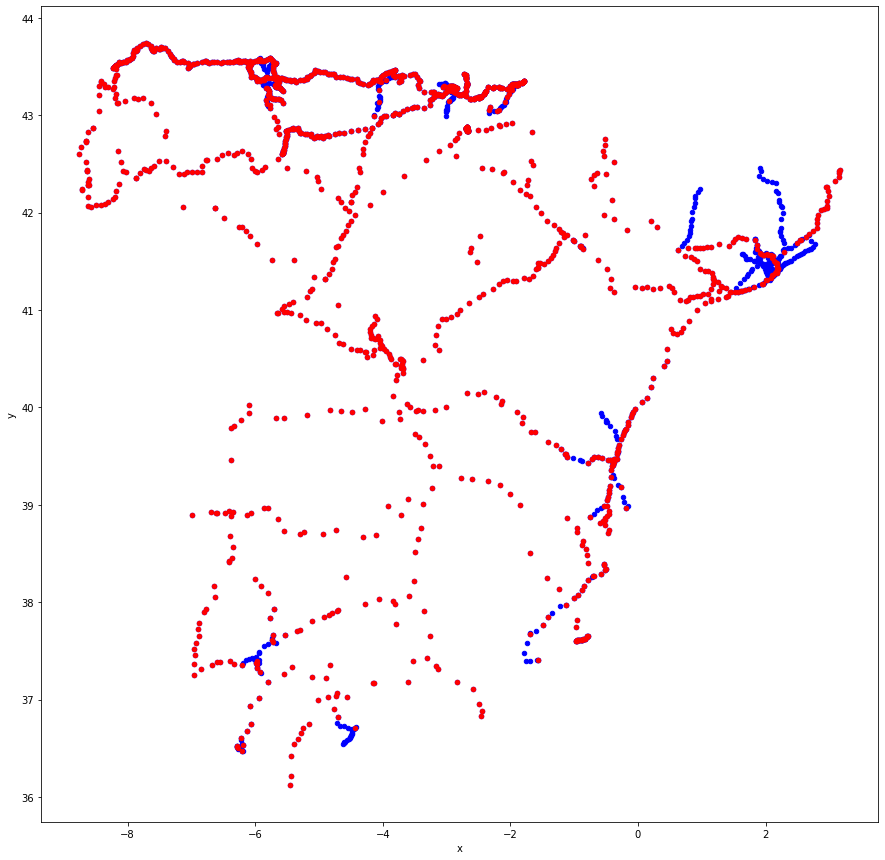

In [29]:
# plot. Blue are total stops, red are stops in the network
f, ax = plt.subplots(figsize=(15,15))
loaded_feeds.stops.plot(ax=ax, kind='scatter', x='stop_lon', y='stop_lat',color = "blue")
urbanaccess_net.transit_nodes.plot(ax=ax, kind='scatter', x='x', y='y', color = "red")

<AxesSubplot:xlabel='stop_lon', ylabel='stop_lat'>

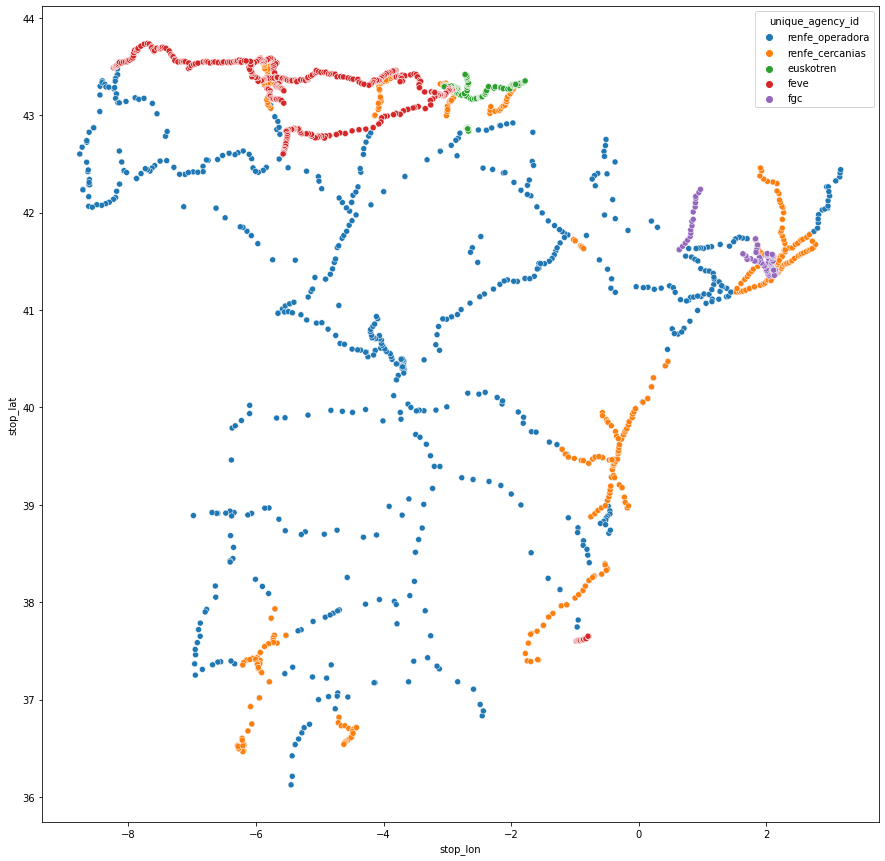

In [25]:
# plot by agency
import seaborn as sns
f, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(ax=ax, x='stop_lon', y='stop_lat', data = loaded_feeds.stops, hue='unique_agency_id')

<AxesSubplot:xlabel='stop_lon', ylabel='stop_lat'>

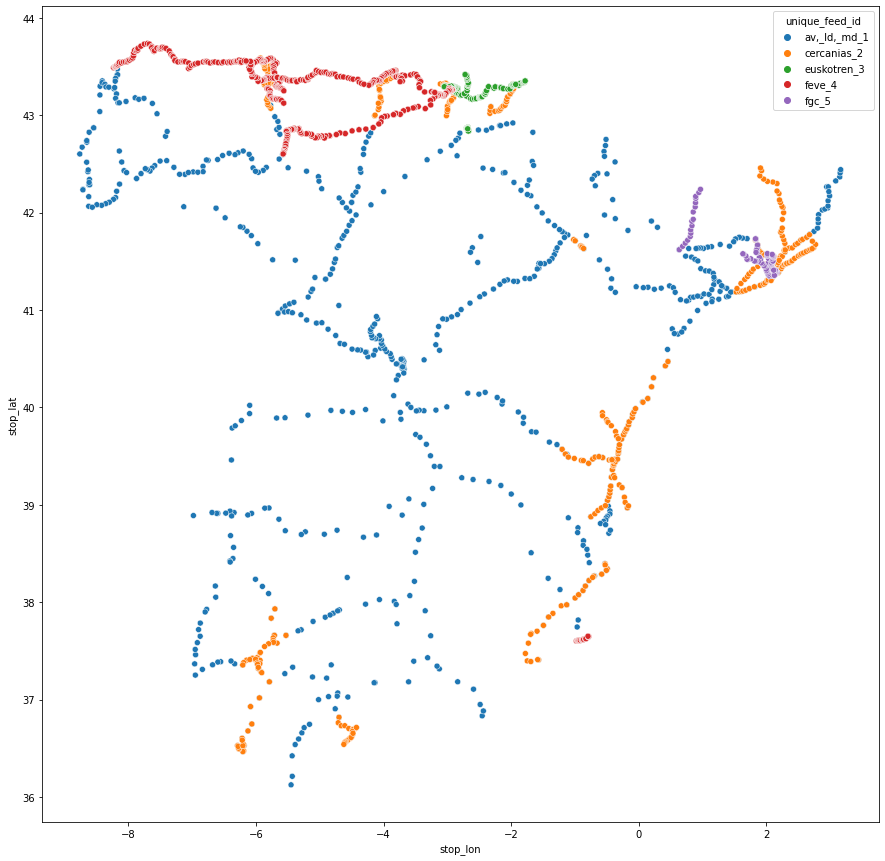

In [28]:
# plot by feed ids
import seaborn as sns
f, ax = plt.subplots(figsize=(15,15))
sns.scatterplot(ax=ax, x='stop_lon', y='stop_lat', data = loaded_feeds.stops, hue= 'unique_feed_id')

In [31]:
# check for duplicates in each agency
for agency in loaded_feeds.stops.unique_agency_id.unique():
    boolean = loaded_feeds.stops["stop_id"].duplicated().any()
    print(agency)
    print(boolean)

renfe_operadora
True
renfe_cercanias
True
euskotren
True
feve
True
fgc
True


In [33]:
# check for agencies passed into network
loaded_feeds.stops.unique_agency_id.unique()
urbanaccess_net.transit_nodes.unique_agency_id.unique()

array(['renfe_operadora', 'renfe_cercanias', 'euskotren', 'feve', 'fgc'],
      dtype=object)

array(['renfe_operadora', 'euskotren', 'feve'], dtype=object)